In [2]:
# Importar librerías necesarias
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
# Cargar el dataset
df = pd.read_csv(r"C:\UNAD\Mall_Customers.csv")

In [22]:
# Normalizar nombres de columnas
data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')

# Mostrar información básica
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            200 non-null    int64 
 1   Gender                200 non-null    object
 2   Age                   200 non-null    int64 
 3   Annual_Income_k$      200 non-null    int64 
 4   Spending_Score_1_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual_Income_k$  Spending_Score_1_100
count  200.000000  200.000000        200.000000            200.000000
mean   100.500000   38.850000         60.560000             50.200000
std     57.879185   13.969007         26.264721             25.823522
min      1.000000   18.000000         15.000000              1.000000
25%     50.750000   28.750000         41.500000             34.750000
50%    100.500000   36.000000         61.500000             50.000000
7

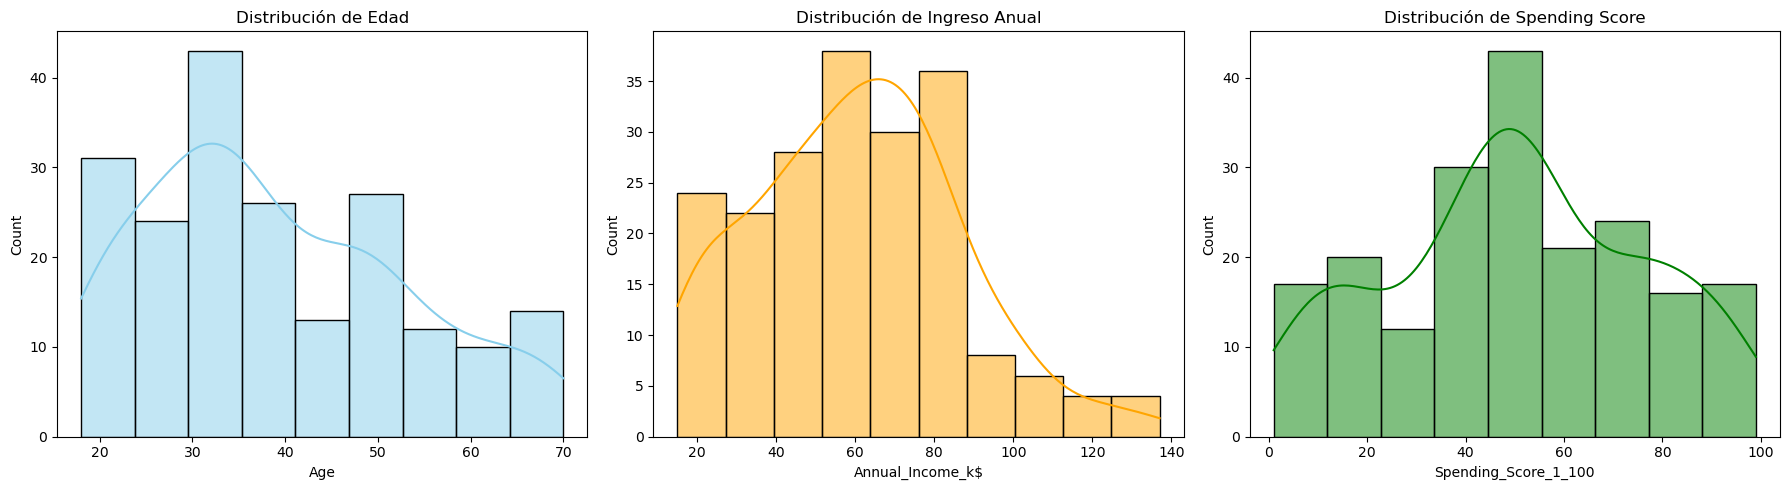

In [24]:
# Graficar distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Age'], kde=True, ax=axes[0], color='skyblue').set(title='Distribución de Edad')
sns.histplot(data['Annual_Income_k$'], kde=True, ax=axes[1], color='orange').set(title='Distribución de Ingreso Anual')
sns.histplot(data['Spending_Score_1_100'], kde=True, ax=axes[2], color='green').set(title='Distribución de Spending Score')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Eliminar columnas irrelevantes
data = data.drop(columns=['CustomerID'])

# Codificar 'Gender' si se desea incluir
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Escalar variables numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual_Income_k$', 'Spending_Score_1_100']])

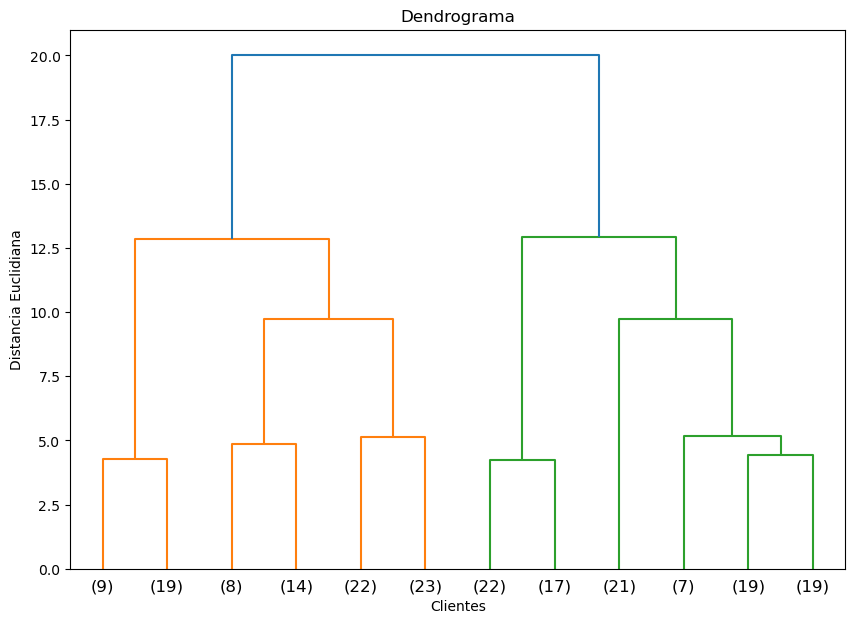

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Calcular el linkage para dendrograma
linked = linkage(scaled_data, method='ward')

# Graficar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Entrenar modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters = model.fit_predict(scaled_data)

# Añadir las etiquetas al dataset original
data['Cluster'] = clusters

In [32]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluar métricas
silhouette_avg = silhouette_score(scaled_data, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silhouette: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570374


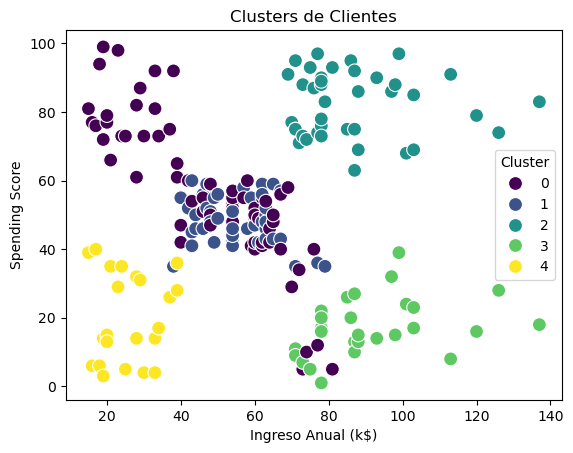

In [34]:
# Visualizar clusters
sns.scatterplot(
    x=data['Annual_Income_k$'],
    y=data['Spending_Score_1_100'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

In [36]:
# Conclusión
print("\nConclusion:")
print("Después de agrupar a los clientes, encontramos que las personas con comportamientos o características parecidas (como cuánto ganan y cuánto gastan) quedaron en los mismos grupos. Esto nos ayuda a entender mejor a los clientes: por ejemplo, podemos ver quiénes son los que más gastan, quiénes compran menos, o quiénes podrían interesarse en ofertas especiales. Así, la tienda puede darles exactamente lo que necesitan y mejorar su experiencia")


Conclusion:
Después de agrupar a los clientes, encontramos que las personas con comportamientos o características parecidas (como cuánto ganan y cuánto gastan) quedaron en los mismos grupos. Esto nos ayuda a entender mejor a los clientes: por ejemplo, podemos ver quiénes son los que más gastan, quiénes compran menos, o quiénes podrían interesarse en ofertas especiales. Así, la tienda puede darles exactamente lo que necesitan y mejorar su experiencia
